In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('tips.csv')

Существует несколько подходов к созданию графиков в Matplotlib. Один из них — объектно-ориентированный подход, он наиболее прозрачный и мощный по функционалу. Процесс работы над графиком начинается с создания объекта, содержащего необходимую информацию и настройки. К этому объекту мы будем добавлять координатную плоскость и другие графические объекты.

В первой строке кода создаётся объект с именем fig, к которому применяются все настройки. Во второй строке создаётся координатная плоскость (axes), которая начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает отведённое место в области (ширина и высота равны 1):

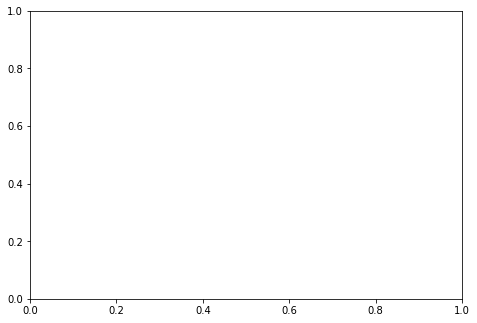

In [3]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])

Теперь мы можем разместить в созданной нами координатной плоскости любую графическую информацию. Например, для построения гистограммы распределения признака «Общая сумма счёта» нам следует применить к axes метод hist:

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

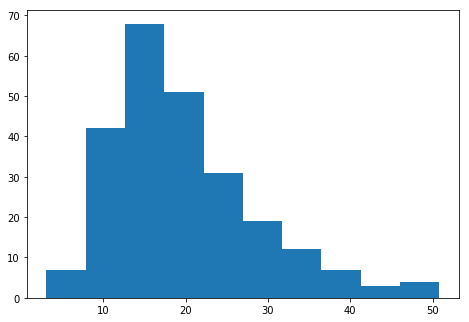

In [4]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

У метода hist можно менять цвет диаграммы (color) и увеличивать количество столбцов для демонстрации распределения (bins).К графику можно добавить заголовки:

- axes.set_title — заголовок диаграммы;
- axes.set_ylabel — заголовок для оси ординат;
- axes.set_xlabel — заголовок для оси абсцисс.

Text(0.5, 0, 'Order price, USD')

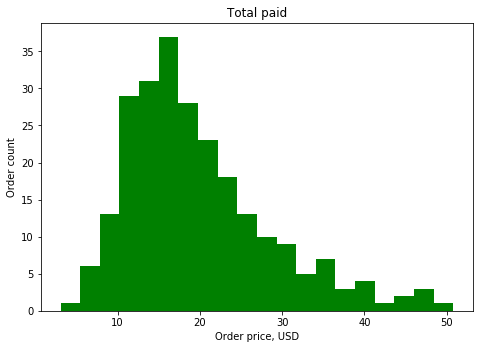

In [5]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Total paid')
axes.set_ylabel('Order count')
axes.set_xlabel('Order price, USD')

Для размещения на координатной плоскости графиков других видов необходимо вызывать соответствующие методы применительно к объекту axes. Например, для создания scatter plot, отображающего связь между суммой счёта и размером чаевых, воспользуемся методом scatter:

Text(0, 0.5, 'Tip amount')

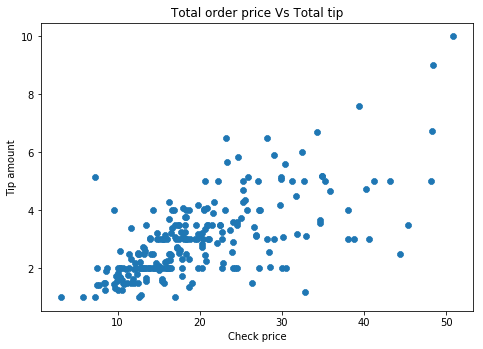

In [6]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = '8')
axes.set_title('Total order price Vs Total tip')
axes.set_xlabel('Check price')
axes.set_ylabel('Tip amount')

Мы можем размещать несколько систем координат на одном объекте, что позволит нам отображать вспомогательную информацию на основном графике. Для добавления второй системы координат необходимо повторно применить к объекту fig метод set_axes, указав новое имя для второй системы координат.

Первые два числовых параметра, указанные при создании систем координат, — это отступ снизу и слева, а следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

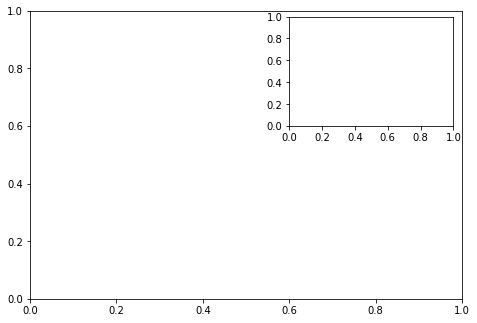

In [7]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])

В основную координатную плоскость разместим гистограмму распределения признака «Общая сумма счета», а в дополнительную — данные о максимальном и минимальном значении этого признака по дням недели. Для создания вспомогательного графика нужно предварительно обработать основной датафрейм и извлечь из него нужную информацию.

Работу по размещению двух графиков в одном объекте начнём с создания вспомогательного датафрейма, содержащего информацию о минимальной и максимальной сумме счёта по дням недели:

In [8]:
tips_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

Для размещения каждого графика применим соответствующий метод к объекту, представляющему нужную нам систему координат: 

- к объекту main_axes применим метод hist;
- для объекта insert_axes используем метод bar.

В коде используется новый для нас приём: для добавления в систему координат каждого типа столбцов мы отдельно применяем метод bar, указывая разные значения параметра height:

Text(0.5, 17.200000000000003, 'Order price, USD')

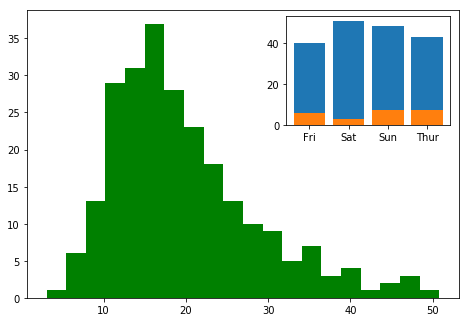

In [9]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
main_axes.hist(df['total_bill'], bins = 20, color = 'green')
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'])
axes.set_title('Total paid')
axes.set_ylabel('Order count')
axes.set_xlabel('Order price, USD')

Недостатком графика является то, что на вспомогательной диаграмме столбцы перекрывают друг друга, из-за чего появляется риск потерять часть информации. Для решения этой проблемы поработаем с настройками метода bar:

<BarContainer object of 4 artists>

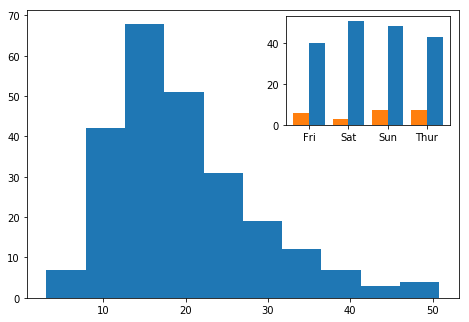

In [10]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'],
              width = 0.4, align = 'edge')
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'],
               width = -0.4, align = 'edge')

Параметр align указывает, следует ли размещать столбцы для отображения каждого значения в центре или необходимо сместить их к краю. С помощью параметра width мы задаём ширину столбца в долях единицы относительно ширины всего пространства, выделенного для данного столбца. Отрицательное значение ширины позволит нам сдвинуть столбцы, отображающие данный параметр, в левую сторону.

Если на графике отображаются данные из нескольких столбцов датафрейма, необходимо сопроводить график дополнительными пояснениями: какой цвет соответствует выводимой информации. Для этого добавим на график легенду при помощи метода legend к объекту axes. Для корректного отображения данных в легенде необходимо добавить параметр label. Место размещения легенды на координатной плоскости задаётся с помощью параметра loc:

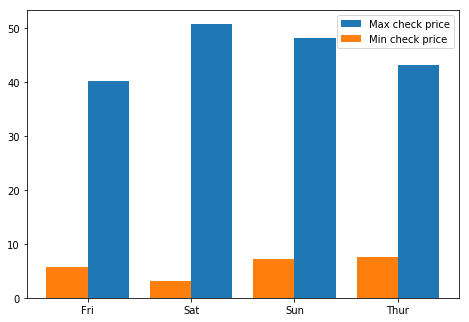

In [15]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = tips_per_day['day'], height = tips_per_day['max'],
        width = 0.4, align = 'edge', label = 'Max check price')
axes.bar(x = tips_per_day['day'], height = tips_per_day['min'],
        width = -0.4, align = 'edge', label = 'Min check price')
axes.legend(loc = 1)

Для того, чтобы легенда не перекрывала часть данных, увеличиваем максимальное значение оси ординат с помощью метода set_ylim к объекту axes:

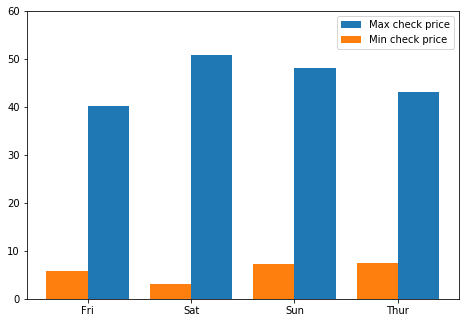

In [18]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = tips_per_day['day'], height = tips_per_day['max'],
        width = 0.4, align = 'edge', label = 'Max check price')
axes.bar(x = tips_per_day['day'], height = tips_per_day['min'],
        width = -0.4, align = 'edge', label = 'Min check price')
axes.legend(loc = 1)

# Subplots

Разместить в одном пространстве несколько графиков можно и с помощью метода subplots. В параметрах фигуры необходимо указать количество строк и столбцов, в которых будут размещаться графики. При желании можно задать размер фигуры в дюймах (ширина*высота):

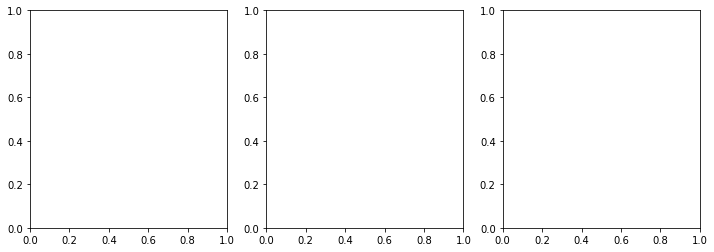

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

Text(0.5, 1.0, 'Total check price Vs Tip price')

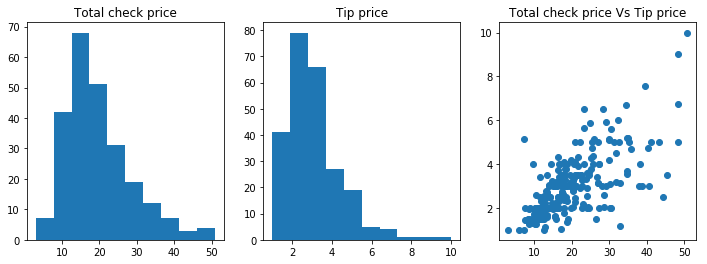

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].hist(df['total_bill'])
axes[0].set_title('Total check price')

axes[1].hist(df['tip'])
axes[1].set_title('Tip price')

axes[2].scatter(x = df['total_bill'], y=df['tip'], marker='o')
axes[2].set_title('Total check price Vs Tip price')

## Создание линейных графиков

In [9]:
import numpy as np

Сгенерируем массив из 1000 чисел, равномерно распределённых в интервале от -3 до 3. Также создадим переменную, содержащую значения функции e^x на отрезке [-3, 3]:

In [10]:
x = np.linspace(start=-3, stop=3., num=1000)
y1 = np.exp(x)

Отрисовка одной кривой
Функция matplotlib.pyplot.plot позволяет отрисовать последовательность значений. Первым аргументом подается последовательность чисел аргумента, вторым — последовательность значений функции для каждого аргумента:

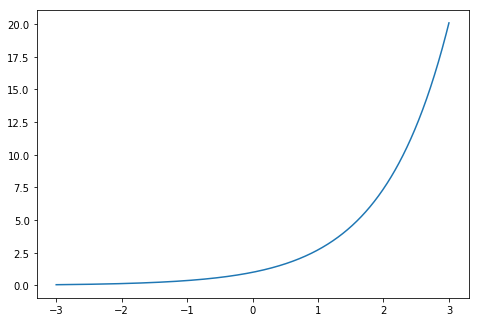

In [31]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x, y1)

Отрисовка нескольких кривых
Функцию plot можно вызвать несколько раз для отрисовки дополнительного контента. В таком случае отрисовка будет выполнена в том же matplotlib.pyplot.figure, который в данном случае создается автоматически при первой отрисовке. Для примера добавим к нашему графику какой-нибудь полином третьей степени:

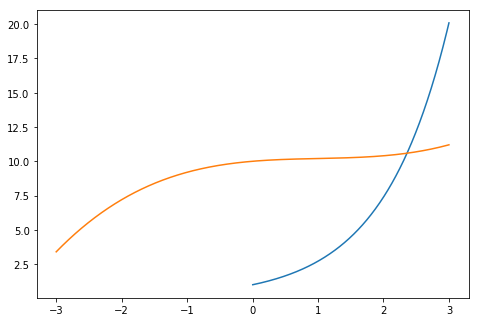

In [33]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x[500:], y1[500:])
axes.plot(x, y2)

### Стили линий
Воспользуемся функцией matplotlib.pyplot.figure для создания фигуры заданного размера. Размер фигуры задается в дюймах. При этом для отображения на реальном дисплее количество пикселей определяется за счет установленного dpi — dots per inch (по умолчанию 100).

При визуализации большого объема данных часто приходится выделять те или иные графики. Как и при написании текстов, это можно сделать с помощью форматирования. Форматирование линии определяется стилем отрисовки, маркировкой или и тем и другим одновременно. Описание возможных стилей и маркеров можно посмотреть в документации.

Отрисуем линию в стиле "dashed line":

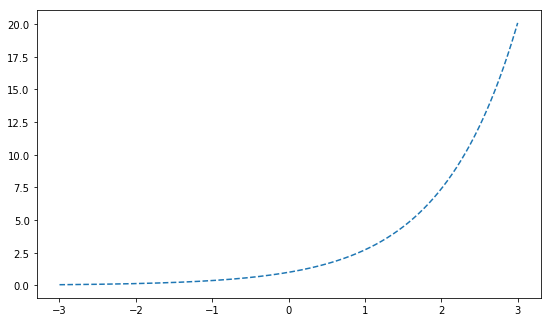

In [13]:
fig = plt.figure(figsize=(7,4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x, y1, linestyle='dashed')

### Цвета и маркеры
Чтобы задать тип маркера и цвет линии, воспользуемся методом форматирования линии. Его структура — это строка, содержащая в полном виде символы, обозначающие цвет маркера, тип маркера и тип линии. Возможен пропуск любого количества из этих трёх параметров. Мы отрисуем линию в фиолетовом цвете ('m' — magenta) с маркером ромба ('D' — diamond marker):

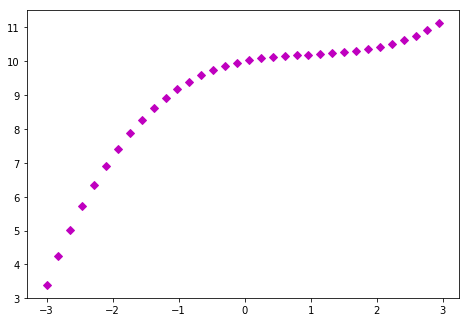

In [39]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x[::30], y2[::30], 'mD')